In [ ]:
# Importing required packages
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plotPointer
import numpy as np
import seaborn as sns

## Documentation for Importing Required Packages


1. **Package Imports**:
   - `from pandas import read_csv`: Imports the `read_csv` function from the `pandas` library for reading CSV files.
   - `from sklearn.model_selection import train_test_split`: Imports the `train_test_split` function from `sklearn.model_selection` for splitting data into training and testing sets.
   - `from sklearn.metrics import accuracy_score`: Imports the `accuracy_score` function from `sklearn.metrics` for calculating accuracy.
   - `from sklearn.compose import ColumnTransformer`: Imports the `ColumnTransformer` class from `sklearn.compose` for transforming columns.
   - `from sklearn.preprocessing import OneHotEncoder`: Imports the `OneHotEncoder` class from `sklearn.preprocessing` for one-hot encoding. It is use for convert numeric data from categorical data.
   - `from sklearn.preprocessing import StandardScaler`: Imports the `StandardScaler` class from `sklearn.preprocessing` for feature scaling.
   - `import matplotlib.pyplot as plotPointer`: Imports the `matplotlib.pyplot` module for data visualization.
   - `import numpy as np`: Imports the `numpy` library for numerical operations.
   - `import seaborn as sns`: Imports the `seaborn` library for enhanced data visualization.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


**from google.colab import files: Imports the files module from the Google Colab library.**
**uploaded=files.upload(): Executes the command to upload files.**

In [ ]:
strokesData = read_csv('healthcare-dataset-stroke-data.csv')
# strokesData.head()
strokesData

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
strokesData = strokesData.dropna()

**The code strokesData = strokesData.dropna() removes rows with missing (NaN) values from the DataFrame strokesData and updates the DataFrame with the missing values removed.**

In [ ]:
if 'id' in strokesData :
 strokesData = strokesData.drop('id', axis=1)

strokesData

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Documentation for Removing Column 'id' from DataFrame


1. **Column Removal**:
   - `if 'id' in strokesData:`: Checks if a column named 'id' exists in the `strokesData` DataFrame.
   - If the column exists, the following line is executed:
     - `strokesData = strokesData.drop('id', axis=1)`: Removes the column 'id' from the DataFrame using the `drop` method with `axis=1`.

2. **DataFrame Display**:
   - `strokesData`: Displays the DataFrame `strokesData` after the column removal.



In [ ]:
#Checking Unique Values for some columns
# Marital Status
strokesData.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Work Type
strokesData.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
# Residence Urban/Rural
strokesData.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
# Smoking Status
strokesData.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
# Gender
strokesData.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
# Spliting the data in training and testing subsets
D = strokesData.values
# iloc to select specefic rows
x = strokesData.iloc[:,:-1]
y = strokesData.iloc[:,-1]

## Documentation for Data Splitting Using iloc


1. **Data Preparation**:
   - `D = strokesData.values`: Retrieves the values from the `strokesData` DataFrame and assigns them to the variable `D`.
   - `x = strokesData.iloc[:,:-1]`: Selects all rows and all columns except the last one from the `strokesData` DataFrame. This is done to extract features and assign them to the variable `x`.
   - `y = strokesData.iloc[:,-1]`: Selects all rows and only the last column from the `strokesData` DataFrame. This is done to extract target labels and assign them to the variable `y`.


In [ ]:
transformingColoumn = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')
x = np.array(transformingColoumn.fit_transform(x))
x
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.50, random_state = 1)

## Documentation for Data Transformation and Train-Test Split


1. **Column Transformation**:
   - `transformingColoumn = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')`: Initializes a `ColumnTransformer` named `transformingColoumn`.
   - Categorical columns at indices 0 and 4 are encoded using `OneHotEncoder`.
   - `remainder='passthrough'` ensures that non-transformed columns are included as well.

2. **Applying Transformation**:
   - `x = np.array(transformingColoumn.fit_transform(x))`: Applies the transformations defined by `transformingColoumn` to the input features (`x`).
   - Transformed data is stored in the NumPy array `x`.

3. **Train-Test Split**:
   - `x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=1)`: Splits the transformed features (`x`) and target labels (`y`) into training and testing subsets.
   - The testing subset size is set to 50% of the dataset.
   - The `random_state=1` parameter ensures

In [ ]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

## Documentation for Feature Scaling Using StandardScaler

This documentation outlines the code that performs feature scaling using the `StandardScaler` from scikit-learn.

### Code Explanation

1. **StandardScaler Initialization**:
   - `sc = StandardScaler()`: Initializes a `StandardScaler` object named `sc`.

2. **Scaling Training Features**:
   - `x_train_scaled = sc.fit_transform(x_train)`: Scales the training features (`x_train`) using the `fit_transform` method of the `StandardScaler`.
   - The scaling is done to standardize the features and bring them to similar scales.

3. **Scaling Testing Features**:
   - `x_test_scaled = sc.fit_transform(x_test)`: Scales the testing features (`x_test`) using the `fit_transform` method of the same `StandardScaler` instance.
   - It's important to note that the same scaler is used for both training and testing data to ensure consistency.

##Implementing Naive Bayes Classifier:

In [ ]:
# Define a function to calculate the mean and standard deviation of a dataset
def mean_and_stddev(dataset):
    mean = np.mean(dataset, axis=0)
    stddev = np.std(dataset, axis=0)
    return mean, stddev

# Define a function to calculate the Gaussian probability density function
def gaussian_pdf(x, mean, stddev):
    exponent = np.exp(-((x - mean) ** 2) / (2 * (stddev ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * stddev)) * exponent

# Define a function to train a Gaussian Naive Bayes classifier
def train_gaussian_naive_bayes(X, y):
    classes = np.unique(y)
    class_priors = {}
    class_means = {}
    class_stddevs = {}

    for c in classes:
        X_c = X[y == c]
        class_priors[c] = len(X_c) / len(X)
        class_means[c], class_stddevs[c] = mean_and_stddev(X_c)

    return class_priors, class_means, class_stddevs

# Define a function to make predictions using the Gaussian Naive Bayes classifier
def predict_gaussian_naive_bayes(X, class_priors, class_means, class_stddevs):
    predictions = []
    for x in X:
        class_scores = {}
        for c in class_priors:
            prior = class_priors[c]
            likelihood = np.prod(gaussian_pdf(x, class_means[c], class_stddevs[c]))
            class_scores[c] = prior * likelihood
        predicted_class = max(class_scores, key=class_scores.get)
        predictions.append(predicted_class)
    return predictions

# Train the Gaussian Naive Bayes model
class_priors, class_means, class_stddevs = train_gaussian_naive_bayes(x_train_scaled, y_train)

# Make predictions on the test data
y_prediction_NB = predict_gaussian_naive_bayes(x_test_scaled, class_priors, class_means, class_stddevs)

# Calculate the accuracy
correct_predictions = np.sum(y_prediction_NB == y_test)
accuracy = correct_predictions / len(y_test)
print('The accuracy of the NB for Testing is: {:.4f}'.format(accuracy))

The accuracy of the NB for Testing is: 0.9605


<Axes: xlabel='gender', ylabel='count'>

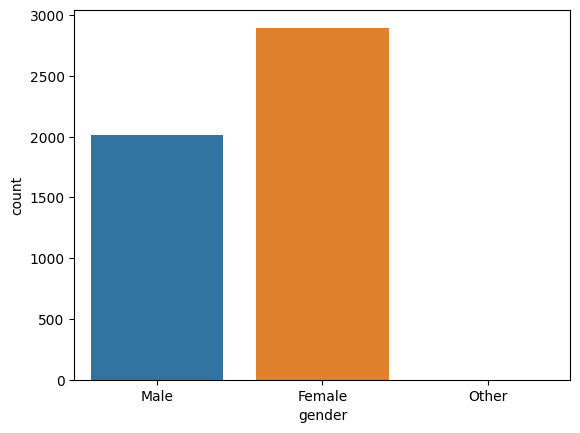

In [ ]:
sns.countplot(x=strokesData['gender'])

**The code uses Seaborn's countplot to create a bar chart. It counts the occurrences of each category in the 'gender' column of the DataFrame strokesData and visualizes the distribution of genders.**

<Axes: xlabel='ever_married', ylabel='count'>

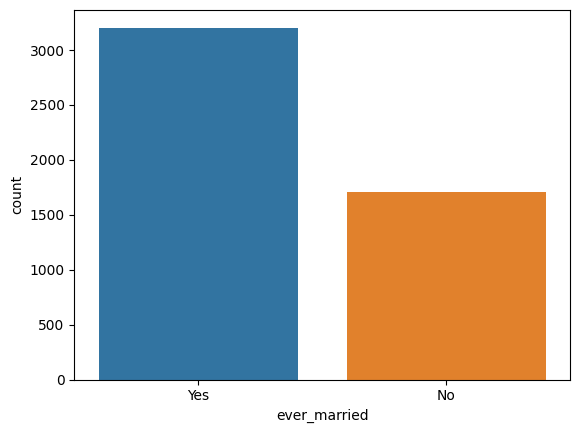

In [ ]:
sns.countplot(x=strokesData['ever_married'])

<Axes: xlabel='work_type', ylabel='count'>

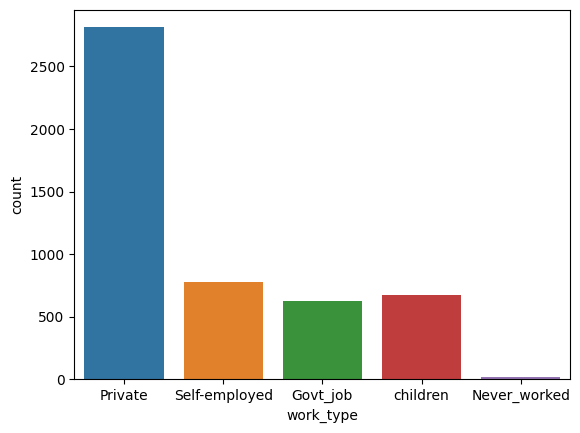

In [ ]:
sns.countplot(x=strokesData['work_type'])

<Axes: xlabel='Residence_type', ylabel='count'>

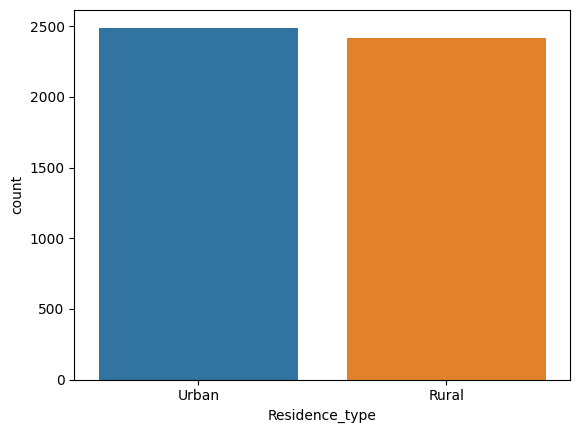

In [ ]:
sns.countplot(x=strokesData['Residence_type'])

<Axes: xlabel='smoking_status', ylabel='count'>

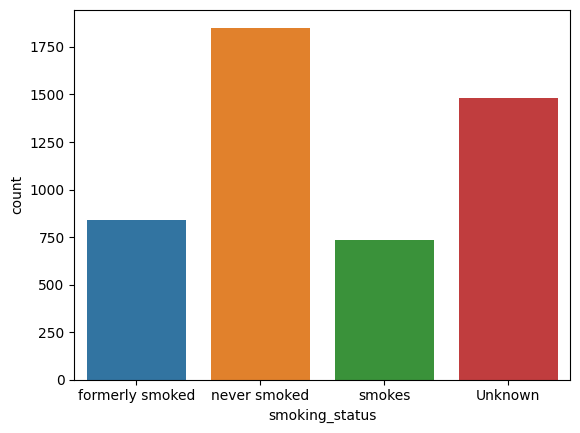

In [ ]:
sns.countplot(x=strokesData['smoking_status'])

<Axes: xlabel='avg_glucose_level', ylabel='count'>

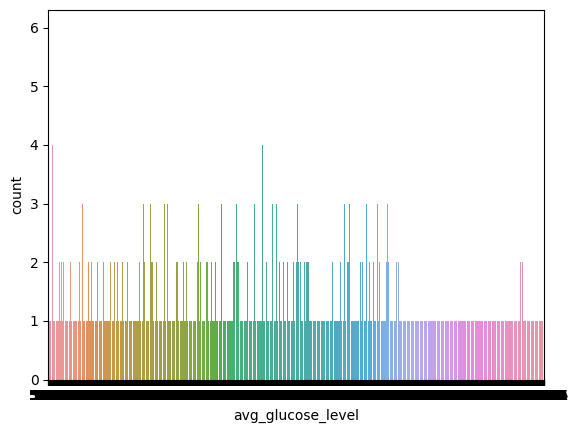

In [ ]:
sns.countplot(x=strokesData['avg_glucose_level'])

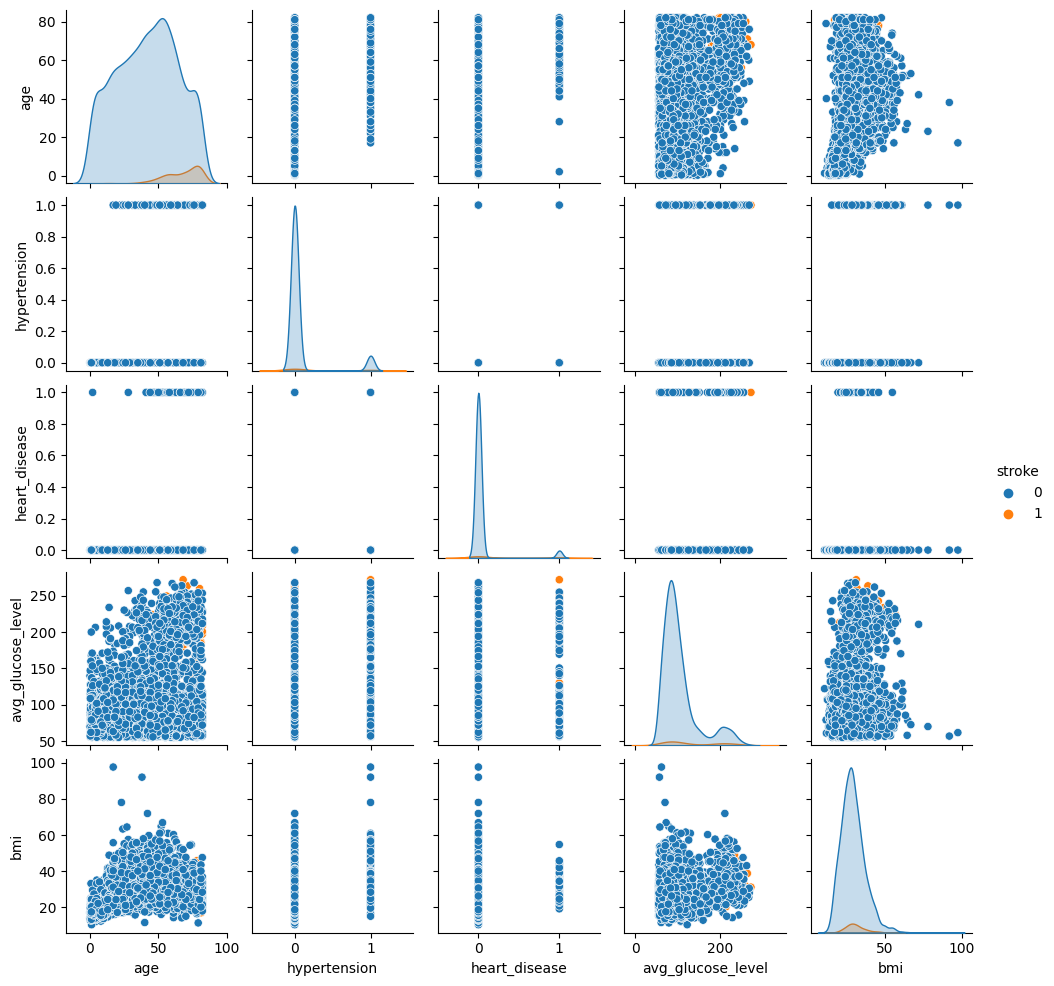

In [ ]:
sns.pairplot(strokesData,hue="stroke",height=2)

**The code uses Seaborn's pairplot to create a grid of scatterplots and histograms. It visualizes relationships between variables in the DataFrame strokesData, with different colors for each point based on the 'stroke' column, and each subplot has a height of 2 units.**